# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
cancer_df= pd.read_csv('C:/Users/Abhishek/Downloads/breast-cancer-wisconsin-data.csv')
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
cancer_df.shape

(699, 11)

In [6]:
cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
# We could see "?" values in column, this should be removed from data set
cancer_df.isnull()
# Check for missing value in any other column

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [10]:
cancer_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
# No missing values found. So let us try to remove ? from bare nuclei column
cancer_df = cancer_df.replace('?', np.nan)
cancer_df.info()
# Get count of rows having ?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [12]:
cancer_df = cancer_df.dropna()

In [13]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')

In [14]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
ID                             683 non-null int64
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [16]:
cancer_df.groupby(["Class"]).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,,
2,444,444,444,444,444,444,444,444,444,444
4,239,239,239,239,239,239,239,239,239,239


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [17]:
# Check for correlation of variable

cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
ClumpThickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Normal Nucleoli,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Bland Chromatin,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


In [18]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Abhishek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Abhishek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


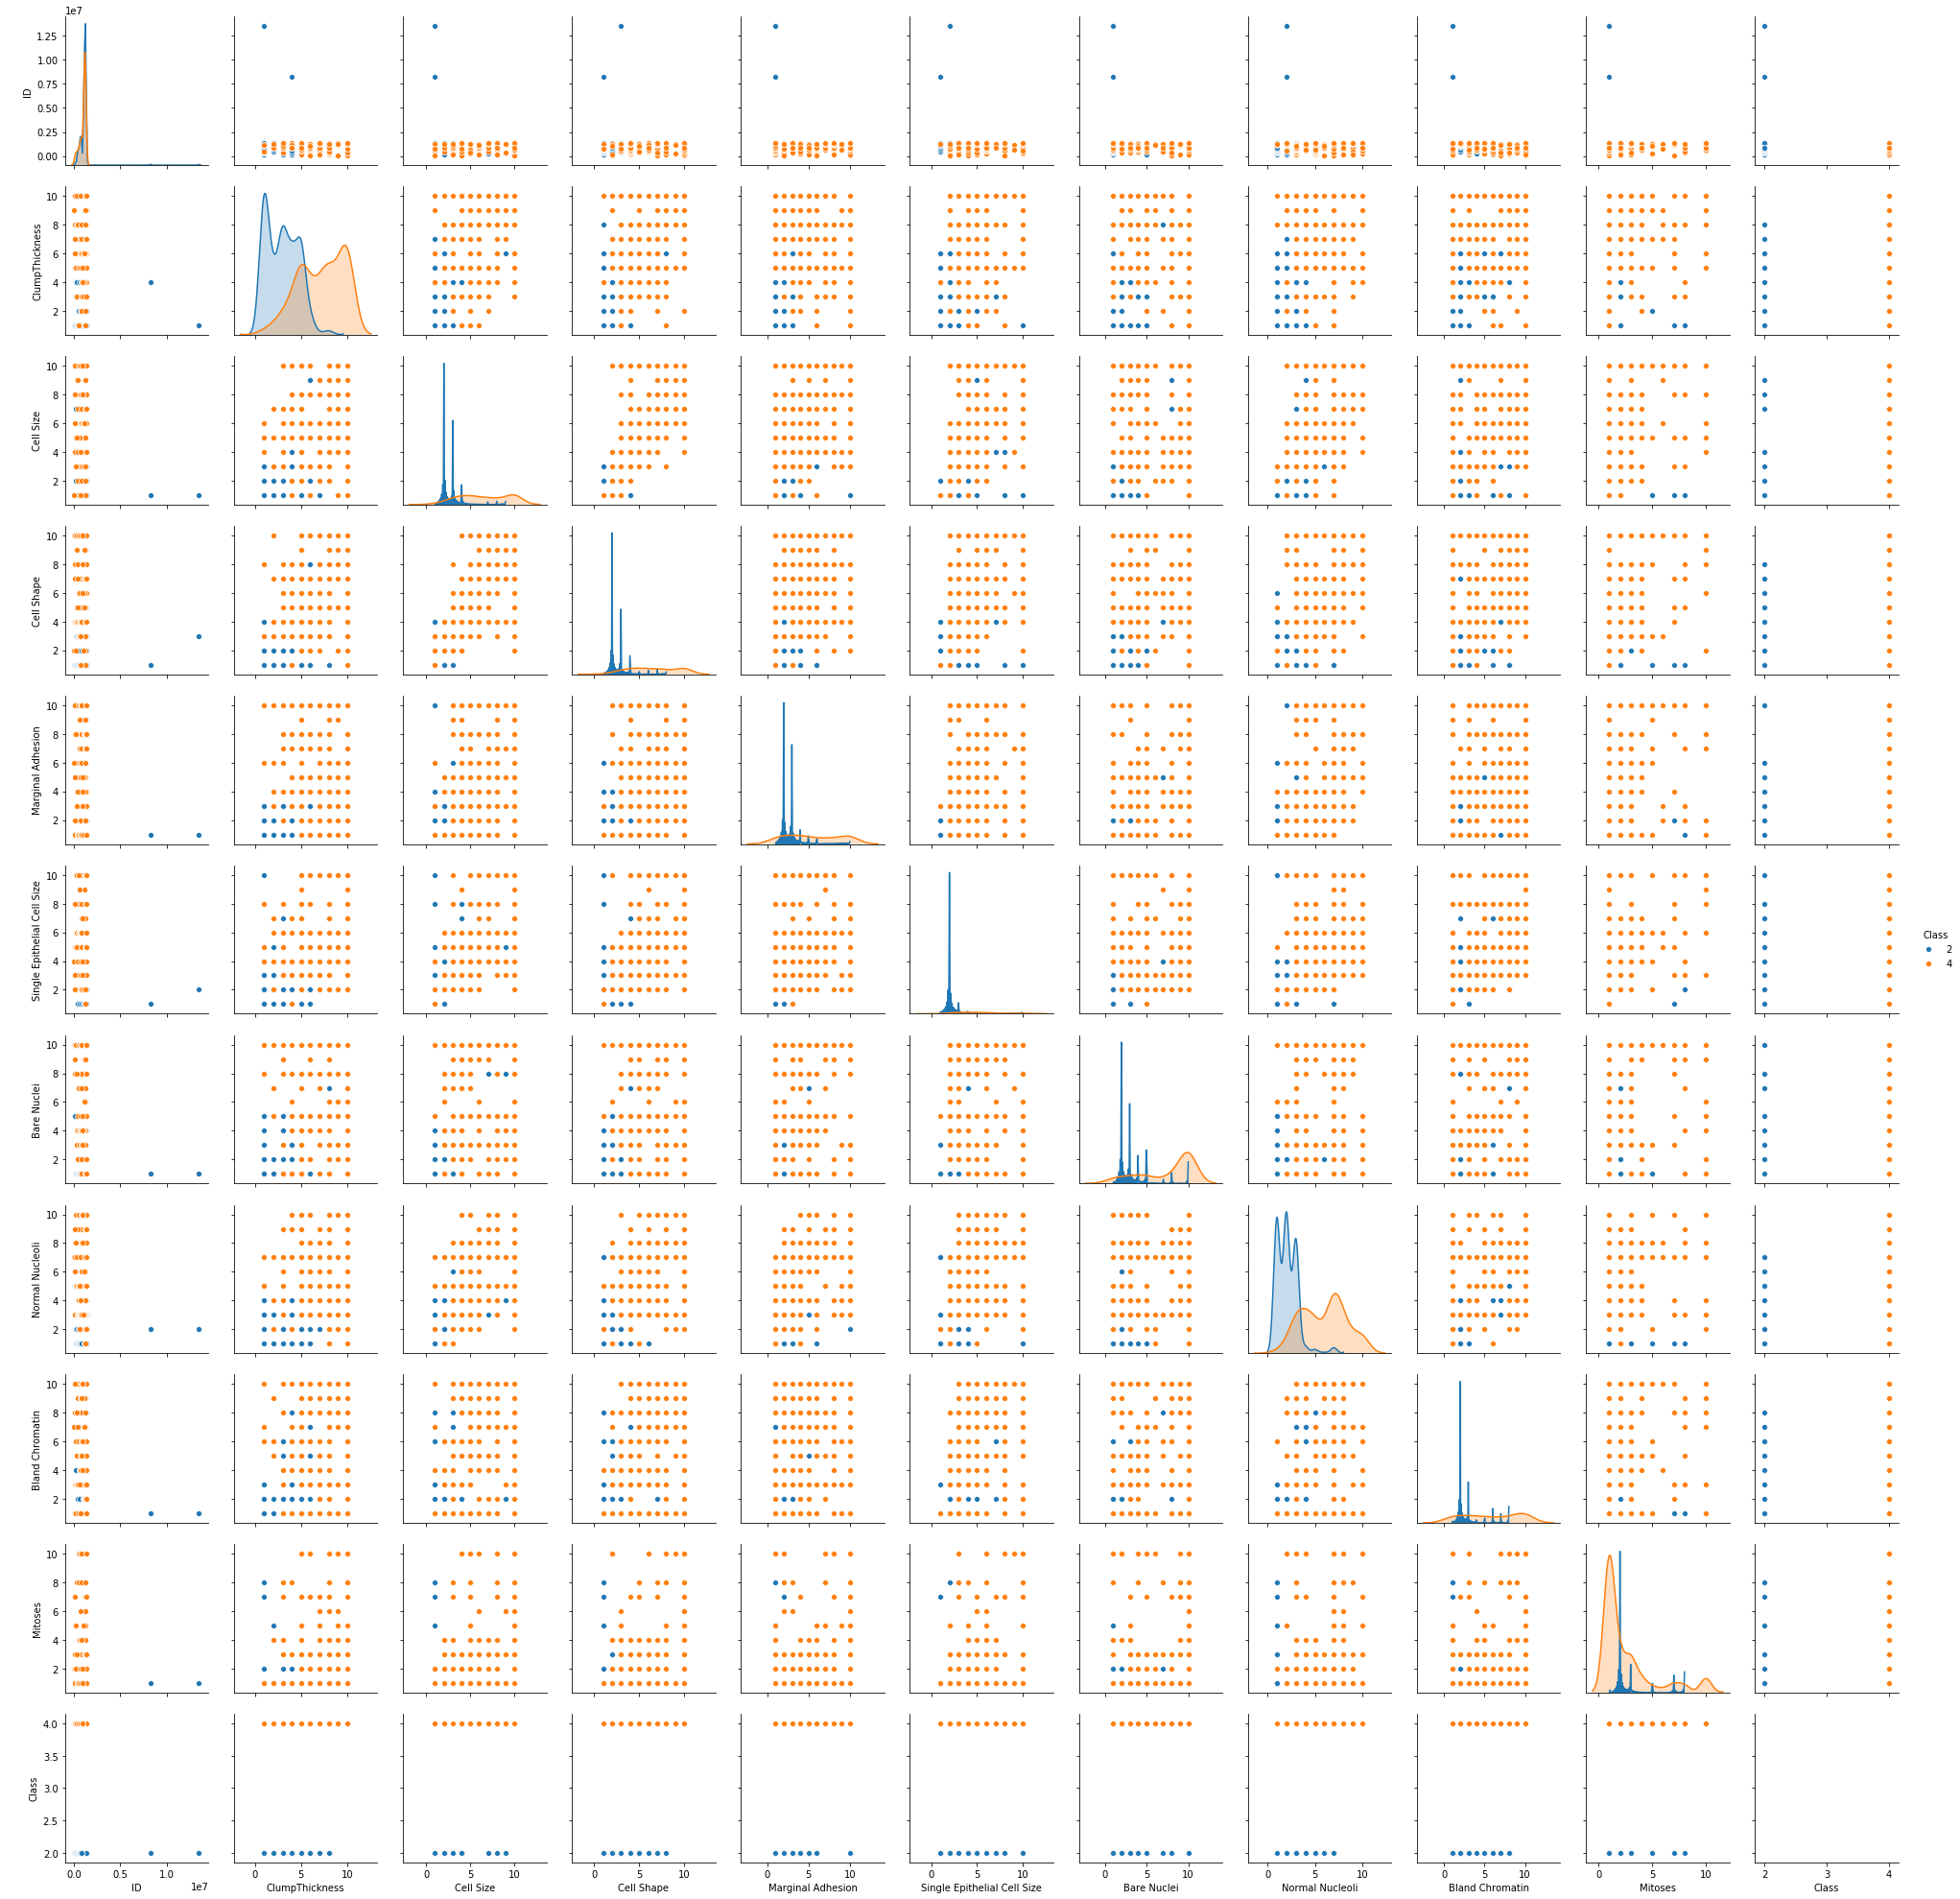

In [19]:
#Let us check for pair plots
import seaborn as sns
sns.pairplot(cancer_df, hue = 'Class', diag_kind = 'kde')

In [20]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [21]:
# We could see most of the outliers are now removed.

In [22]:
cancer_df=cancer_df.drop('ID', axis=1)

In [23]:
X = cancer_df.drop('Class', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = cancer_df[['Class']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

# Q6 Create a covariance matrix for identifying Principal components

In [27]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00195695 0.62569936 0.64706327 0.49059401 0.51084783 0.60223189
  0.54944293 0.55544814 0.35067851]
 [0.62569936 1.00195695 0.91196789 0.71003727 0.74339474 0.71526627
  0.76071312 0.73348684 0.47030746]
 [0.64706327 0.91196789 1.00195695 0.68908362 0.71246401 0.72622487
  0.72466607 0.74100436 0.4484994 ]
 [0.49059401 0.71003727 0.68908362 1.00195695 0.60633263 0.71648538
  0.6658859  0.61098555 0.38633627]
 [0.51084783 0.74339474 0.71246401 0.60633263 1.00195695 0.583398
  0.60176484 0.66900694 0.49065388]
 [0.60223189 0.71526627 0.72622487 0.71648538 0.583398   1.00195695
  0.68396632 0.58673718 0.34967214]
 [0.54944293 0.76071312 0.72466607 0.6658859  0.60176484 0.68396632
  1.00195695 0.67091375 0.32763675]
 [0.55544814 0.73348684 0.74100436 0.61098555 0.66900694 0.58673718
  0.67091375 1.00195695 0.42068659]
 [0.35067851 0.47030746 0.4484994  0.38633627 0.49065388 0.34967214
  0.32763675 0.42068659 1.00195695]]


# Q7 Identify eigen values and eigen vector

In [28]:
# Step 2- Get eigen values and eigen vector

In [29]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.29976889 -0.10490448  0.88743554  0.02227049 -0.01908263 -0.07415581
  -0.21229775 -0.1682713  -0.17845744]
 [-0.38064725 -0.02670106 -0.06207356  0.72800769  0.14306027 -0.03419331
  -0.21431581  0.35307181  0.35821783]
 [-0.37688977 -0.05320378  0.01916767 -0.66723923  0.14934779 -0.04215162
  -0.11231127  0.29191065  0.53632145]
 [-0.33399136 -0.13919297 -0.35998148 -0.03549427 -0.48417197 -0.11370175
  -0.50364013 -0.48702382  0.00569359]
 [-0.33469672  0.21135274 -0.19976441 -0.06453385  0.35781407 -0.68079797
   0.07505989  0.04184988 -0.44758854]
 [-0.33954874 -0.25027766  0.02941227  0.06192599 -0.50840303 -0.14695948
   0.72763333  0.06609907  0.0589725 ]
 [-0.3420004  -0.25544932 -0.16361738 -0.10494965  0.0240836   0.55023197
  -0.09107616  0.37119197 -0.57496322]
 [-0.34019616  0.02174058 -0.08771505  0.06028454  0.49669991  0.36551783
   0.31313364 -0.61388085  0.13133664]
 [-0.22723823  0.89052843  0.0584422  -0.01981654 -0.29773644  0.23913473
   0

# Q8 Find variance and cumulative variance by each eigen vector

In [30]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 65.78414241  74.58721929  80.63116034  85.96345594  89.8265758
  93.23807879  96.27616367  99.07013069 100.        ]


In [31]:
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:6]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)  

np.dot(X_test_std,P_reduce) 

array([[ 0.83059623, -0.11877228, -0.0822353 , -0.68148984, -0.52183501,
        -0.99258954],
       [ 1.84330313,  0.08113818, -0.69869464,  0.04975237,  0.29180043,
         0.2295522 ],
       [ 1.52331239, -0.03084296,  0.24860567,  0.02938247,  0.2126422 ,
         0.04992963],
       ...,
       [ 1.52331239, -0.03084296,  0.24860567,  0.02938247,  0.2126422 ,
         0.04992963],
       [ 1.47430357, -0.0656069 ,  0.33095713, -0.26070675, -0.09079499,
        -0.06365215],
       [ 1.90939729,  0.02057667,  0.08323991, -0.12450234,  0.30381889,
        -0.05788175]])

In [32]:
print(y_train.shape)
X_train_std.shape, P_reduce.shape, Proj_train_data.shape

(512, 1)


((512, 9), (9, 6), (512, 6))

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

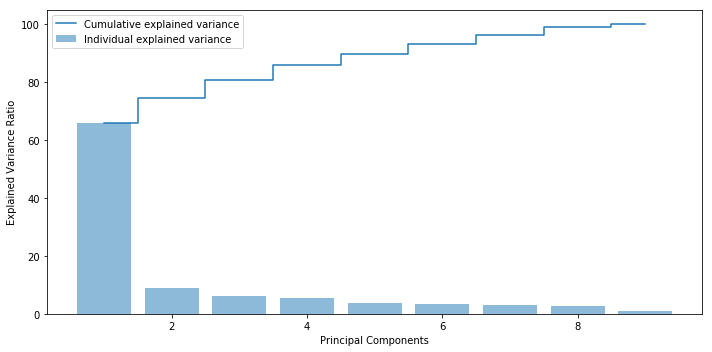

In [33]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.decomposition import PCA
import sklearn.decomposition as dec
import sklearn.datasets as ds

In [44]:
pc = dec.PCA()

In [45]:
X_new = pc.fit_transform(X)

In [46]:
pc.components_


array([[ 0.29673577,  0.40397067,  0.39275858,  0.33120214,  0.24973982,
         0.44261347,  0.29207832,  0.35453597,  0.12457633],
       [-0.07350664,  0.22992885,  0.16470098, -0.09819754,  0.20021505,
        -0.78056963,  0.00847974,  0.46919452,  0.18806889],
       [-0.85200897, -0.02627438, -0.07445454,  0.47385846,  0.03165568,
         0.09341837,  0.12241209,  0.13372376,  0.02663127],
       [ 0.04706374,  0.29461882,  0.20651466,  0.39419863,  0.18882266,
        -0.29438441, -0.04122305, -0.75394927,  0.14313933],
       [-0.39976537,  0.33796907,  0.37015092, -0.64249922,  0.19505447,
         0.16867448,  0.09259014, -0.19689024, -0.24962286],
       [-0.09754668, -0.09240845, -0.08733061, -0.18980035,  0.40135442,
         0.25296268, -0.46305857, -0.00420984,  0.70624221],
       [-0.03612583,  0.17495075,  0.34688571,  0.18381614, -0.28345153,
         0.05368932, -0.79596032,  0.15775058, -0.26889348],
       [ 0.08795577, -0.13045578, -0.24226147,  0.12769869,  0

In [40]:
pc.explained_variance_

array([49.04736573,  5.11071961,  4.3015747 ,  3.15520074,  2.77056914,
        2.44623225,  1.79671043,  1.59571469,  0.8068011 ])

In [41]:
pc.n_features_

9

# Q10 Find correlation between components and features

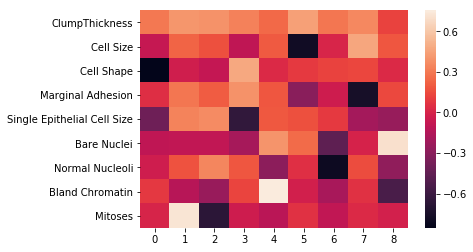

In [48]:
sns.heatmap(pd.DataFrame(pc.components_, list(X.columns)))

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [118]:
movies_df = pd.read_csv('C:/Users/Abhishek/Downloads/movies_metadata.csv')
movies_df.head()

C:\Users\Abhishek\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [50]:
joke_df=pd.read_csv('C:/Users/Abhishek/Downloads/jokes.csv')
joke_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [52]:
ratings_df=joke_df.iloc[0:200,1:101]
ratings_df.head()


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [54]:
ratings_df.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [55]:
ratings_df.columns=range(0,100)

In [56]:
ratings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [57]:
ratings_df=ratings_df.replace(99.00,0)


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [58]:
scale = StandardScaler()

In [61]:
ratings_diff = scale.fit_transform(ratings_df) 
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [76]:
import numpy as np  

temp=ratings_diff.mean(axis=0)
temp

array([ 0.00000000e+00,  1.77635684e-17, -2.88657986e-17, -1.33226763e-17,
       -2.22044605e-18, -6.66133815e-18,  6.66133815e-18,  1.66533454e-17,
       -5.32907052e-17,  8.88178420e-18, -3.55271368e-17, -4.44089210e-17,
       -8.88178420e-18,  3.55271368e-17, -8.88178420e-18, -1.19904087e-16,
        1.99840144e-17,  2.55351296e-17,  8.88178420e-18,  2.66453526e-17,
        1.11022302e-16, -1.77635684e-17, -2.66453526e-17,  4.44089210e-17,
       -1.33226763e-17, -5.32907052e-17, -1.77635684e-17,  8.88178420e-18,
        0.00000000e+00,  0.00000000e+00,  3.55271368e-17, -1.06581410e-16,
        4.44089210e-18,  4.44089210e-18, -8.88178420e-18,  1.77635684e-17,
        1.77635684e-17, -2.22044605e-17, -1.77635684e-17,  1.11022302e-17,
        0.00000000e+00,  1.33226763e-17,  3.10862447e-17, -2.66453526e-17,
        8.88178420e-18, -1.33226763e-17, -1.77635684e-17,  7.77156117e-17,
       -1.77635684e-17,  7.10542736e-17, -8.88178420e-18, -8.88178420e-18,
       -4.44089210e-18,  

In [117]:
temp.sort()
temp

array([-1.19904087e-16, -1.06581410e-16, -5.77315973e-17, -5.77315973e-17,
       -5.32907052e-17, -5.32907052e-17, -4.44089210e-17, -4.44089210e-17,
       -3.55271368e-17, -3.55271368e-17, -3.55271368e-17, -2.88657986e-17,
       -2.66453526e-17, -2.66453526e-17, -2.66453526e-17, -2.66453526e-17,
       -2.22044605e-17, -2.22044605e-17, -2.22044605e-17, -2.22044605e-17,
       -2.22044605e-17, -2.22044605e-17, -1.77635684e-17, -1.77635684e-17,
       -1.77635684e-17, -1.77635684e-17, -1.77635684e-17, -1.77635684e-17,
       -1.77635684e-17, -1.38777878e-17, -1.33226763e-17, -1.33226763e-17,
       -1.33226763e-17, -1.33226763e-17, -1.33226763e-17, -1.33226763e-17,
       -1.11022302e-17, -8.88178420e-18, -8.88178420e-18, -8.88178420e-18,
       -8.88178420e-18, -8.88178420e-18, -8.88178420e-18, -6.66133815e-18,
       -4.44089210e-18, -4.44089210e-18, -4.44089210e-18, -2.22044605e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  